In [1]:
__depends__ = [
    "../../data/protocol",
    "../../figures",
    "../../data/protocol/rcmip-emissions-annual-means.csv",
    "../../data/protocol/rcmip-radiative-forcing-annual-means.csv",
    "../../data/protocol/rcmip-concentrations-annual-means.csv",
    "../../data/protocol/rcmip-concentrations.csv",
]
__dest__ = []

In [2]:
DATA_PROTOCOL_DIR = __depends__[0]
FIGURES_DIR = __depends__[1]
ANNUAL_MEAN_DATA = [__depends__[i] for i in range(2, 5)]
MONTHLY_DATA = [__depends__[i] for i in range(5, 6)]

In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Playground

A notebook for playing around with the protocol data without the clutter of all the processing code.

## Imports

In [4]:
import glob
import os.path

import matplotlib.pyplot as plt
import numpy as np
import scmdata
import pyam
import tqdm
from matplotlib.ticker import AutoMinorLocator

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plotting stuff

In [5]:
color_map_variables = {
    "Emissions|CO2|MAGICC AFOLU": "tab:green",
    "Emissions|CO2|MAGICC Fossil and Industrial": "tab:gray",
    "Effective Radiative Forcing|Anthropogenic|CO2": "tab:green",
    "Effective Radiative Forcing|Anthropogenic|CH4": "tab:blue",
    "Effective Radiative Forcing|Anthropogenic|N2O": "tab:red",
    "Effective Radiative Forcing|Anthropogenic|Other|Other WMGHGs": "lightskyblue",
    "Effective Radiative Forcing|Anthropogenic|Stratospheric Ozone": "tab:gray",
    "Effective Radiative Forcing|Anthropogenic|Tropospheric Ozone": "tab:brown",
    "Effective Radiative Forcing|Anthropogenic|Aerosols": "lightgray",
    "Effective Radiative Forcing|Anthropogenic|Aerosols|Aerosols-cloud Interactions": "tab:pink",
    "Effective Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions": "tab:purple",
    "Effective Radiative Forcing|Anthropogenic|Other anthropogenic": "tab:blue",
    "Effective Radiative Forcing|Anthropogenic|Halogens": "tab:olive",
    "Effective Radiative Forcing|Anthropogenic": "tab:gray",
    "Effective Radiative Forcing|Natural": "black",
    "Effective Radiative Forcing": "black",
}

pyam.run_control().update({"color": {"variable": color_map_variables}})

color_map_scenarios = {
    "ssp119": "AR6-SSP1-1.9",
    "ssp126": "AR6-SSP1-2.6",
    "ssp245": "AR6-SSP2-4.5",
    "ssp370": "AR6-SSP3-7.0",
    "ssp370-lowNTCF": "AR6-SSP3-LowNTCF",
    "ssp434": "AR6-SSP4-3.4",
    "ssp460": "AR6-SSP4-6.0",
    "ssp585": "AR6-SSP5-8.5",
    "ssp534-over": "AR6-SSP5-3.4-OS",
    "historical-cmip6": "black",
    "rcp26": "AR5-RCP-2.6",
    "rcp45": "AR5-RCP-4.5",
    "rcp60": "AR5-RCP-6.0",
    "rcp85": "AR5-RCP-8.5",
    "historical-cmip5": "tab:gray",
}

pyam.run_control().update({"color": {"scenario": color_map_scenarios}})

<IPython.core.display.Javascript object>

## Data

In [6]:
ANNUAL_MEAN_DATA

['../../data/protocol/rcmip-emissions-annual-means.csv',
 '../../data/protocol/rcmip-radiative-forcing-annual-means.csv',
 '../../data/protocol/rcmip-concentrations-annual-means.csv']

<IPython.core.display.Javascript object>

In [7]:
db = scmdata.df_append(ANNUAL_MEAN_DATA)

<IPython.core.display.Javascript object>

In [8]:
MONTHLY_DATA

['../../data/protocol/rcmip-concentrations.csv']

<IPython.core.display.Javascript object>

In [9]:
db_monthly = scmdata.df_append(MONTHLY_DATA)

<IPython.core.display.Javascript object>

In [10]:
db.timeseries().head()

time                                                                           1700-01-01 00:00:00  \
model     scenario         region variable      unit      activity_id mip_era                        
idealised esm-bell-1000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-750PgC  World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-1000PgC World  Emissions|CH4 Mt CH4/yr ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|CH4 Mt CH4/yr ZECMIP      CMIP6                    NaN   

time                                                                           1701-01-01 00:00:00  \
model     scenario         region variable      unit      activity_id mip_era                        
idealised esm-bell-1000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-750PgC  World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-1000PgC World  Emissions|CH4 Mt CH4/yr ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|CH4 Mt CH4/yr ZECMIP      CMIP6                    NaN   

time                                                                           1702-01-01 00:00:00  \
model     scenario         region variable      unit      activity_id mip_era                        
idealised esm-bell-1000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-750PgC  World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-1000PgC World  Emissions|CH4 Mt CH4/yr ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|CH4 Mt CH4/yr ZECMIP      CMIP6                    NaN   

time                                                                           1703-01-01 00:00:00  \
model     scenario         region variable      unit      activity_id mip_era                        
idealised esm-bell-1000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-750PgC  World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-1000PgC World  Emissions|CH4 Mt CH4/yr ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|CH4 Mt CH4/yr ZECMIP      CMIP6                    NaN   

time                                                                           1704-01-01 00:00:00  \
model     scenario         region variable      unit      activity_id mip_era                        
idealised esm-bell-1000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-750PgC  World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-1000PgC World  Emissions|CH4 Mt CH4/yr ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|CH4 Mt CH4/yr ZECMIP      CMIP6                    NaN   

time                                                                           1705-01-01 00:00:00  \
model     scenario         region variable      unit      activity_id mip_era                        
idealised esm-bell-1000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bell-2000PgC World  Emissions|BC  Mt BC/yr  ZECMIP      CMIP6                    NaN   
          esm-bel

<IPython.core.display.Javascript object>

In [11]:
db["scenario"].unique()

array(['esm-bell-1000PgC', 'esm-bell-2000PgC', 'esm-bell-750PgC', 'rcp60',
       'rcp26', 'rcp85', 'rcp45', 'historical-cmip5', 'ssp370',
       'ssp370-lowNTCF', 'ssp434', 'ssp460', 'ssp119', 'ssp126', 'ssp245',
       'ssp534-over', 'ssp585', '1pctCO2', '1pctCO2-4xext',
       'abrupt-0p5xCO2', 'abrupt-2xCO2', 'abrupt-4xCO2', 'historical',
       'piControl', 'esm-pi-CO2pulse', 'esm-pi-cdr-pulse',
       'esm-piControl'], dtype=object)

<IPython.core.display.Javascript object>

In [12]:
db["region"].unique()

array(['World', 'World|Northern Hemisphere', 'World|Southern Hemisphere',
       'World|R5.2ASIA', 'World|R5.2LAM', 'World|R5.2MAF',
       'World|R5.2OECD', 'World|R5.2REF'], dtype=object)

<IPython.core.display.Javascript object>

In [13]:
db.filter(variable="Emissions*")[["variable", "unit"]].drop_duplicates()

variable       unit
0                                          Emissions|BC   Mt BC/yr
3                                         Emissions|CH4  Mt CH4/yr
6                                          Emissions|CO   Mt CO/yr
9                                         Emissions|CO2  Mt CO2/yr
12                           Emissions|CO2|MAGICC AFOLU  Mt CO2/yr
...                                                 ...        ...
3483  Emissions|Sulfur|MAGICC Fossil and Industrial|...  Mt SO2/yr
3493  Emissions|Sulfur|MAGICC Fossil and Industrial|...  Mt SO2/yr
3553  Emissions|Sulfur|MAGICC Fossil and Industrial|...  Mt SO2/yr
3613  Emissions|Sulfur|MAGICC Fossil and Industrial|...  Mt SO2/yr
3673  Emissions|Sulfur|MAGICC Fossil and Industrial|...  Mt SO2/yr

[92 rows x 2 columns]

<IPython.core.display.Javascript object>

In [14]:
db.filter(variable="*Concentrations*")[["variable", "unit"]].drop_duplicates()

variable unit
120                     Atmospheric Concentrations|CH4  ppb
173                     Atmospheric Concentrations|CO2  ppm
226      Atmospheric Concentrations|F-Gases|HFC|HFC125  ppt
231     Atmospheric Concentrations|F-Gases|HFC|HFC134a  ppt
236     Atmospheric Concentrations|F-Gases|HFC|HFC143a  ppt
241    Atmospheric Concentrations|F-Gases|HFC|HFC227ea  ppt
246       Atmospheric Concentrations|F-Gases|HFC|HFC23  ppt
251    Atmospheric Concentrations|F-Gases|HFC|HFC245fa  ppt
256       Atmospheric Concentrations|F-Gases|HFC|HFC32  ppt
261  Atmospheric Concentrations|F-Gases|HFC|HFC4310mee  ppt
266        Atmospheric Concentrations|F-Gases|PFC|C2F6  ppt
271       Atmospheric Concentrations|F-Gases|PFC|C6F14  ppt
276         Atmospheric Concentrations|F-Gases|PFC|CF4  ppt
281             Atmospheric Concentrations|F-Gases|SF6  ppt
286     Atmospheric Concentrations|Montreal Gases|CCl4  ppt
291  Atmospheric Concentrations|Montreal Gases|CFC|...  ppt
296  Atmospheric Concentrations|Montreal Gases|CFC|...  ppt
301  Atmospheric Concentrations|Montreal Gases|CFC|...  ppt
306  Atmospheric Concentrations|Montreal Gases|CFC|...  ppt
311  Atmospheric Concentrations|Montreal Gases|CFC|...  ppt
316    Atmospheric Concentrations|Montreal Gases|CH3Br  ppt
321  Atmospheric Concentrations|Montreal Gases|CH3CCl3  ppt
326    Atmospheric Concentrations|Montreal Gases|CH3Cl  ppt
331  Atmospheric Concentrations|Montreal Gases|HCFC...  ppt
336  Atmospheric Concentrations|Montreal Gases|HCFC...  ppt
341   Atmospheric Concentrations|Montreal Gases|HCFC22  ppt
346  Atmospheric Concentrations|Montreal Gases|Halo...  ppt
351  Atmospheric Concentrations|Montreal Gases|Halo...  ppt
356  Atmospheric Concentrations|Montreal Gases|Halo...  ppt
361  Atmospheric Concentrations|Montreal Gases|Halo...  ppt
366                     Atmospheric Concentrations|N2O  ppb

<IPython.core.display.Javascript object>

In [15]:
db.filter(variable="*Forcing*")[["variable", "unit"]].drop_duplicates()

variable   unit
371                         Effective Radiative Forcing  W/m^2
381           Effective Radiative Forcing|Anthropogenic  W/m^2
391   Effective Radiative Forcing|Anthropogenic|Aero...  W/m^2
401   Effective Radiative Forcing|Anthropogenic|Aero...  W/m^2
411   Effective Radiative Forcing|Anthropogenic|Aero...  W/m^2
...                                                 ...    ...
4006  Radiative Forcing|Anthropogenic|Stratospheric ...  W/m^2
4011  Radiative Forcing|Anthropogenic|Tropospheric O...  W/m^2
4016                          Radiative Forcing|Natural  W/m^2
4021                    Radiative Forcing|Natural|Solar  W/m^2
4026                 Radiative Forcing|Natural|Volcanic  W/m^2

[77 rows x 2 columns]

<IPython.core.display.Javascript object>

## Visualisation

INFO:root:>=13 labels, not applying legend


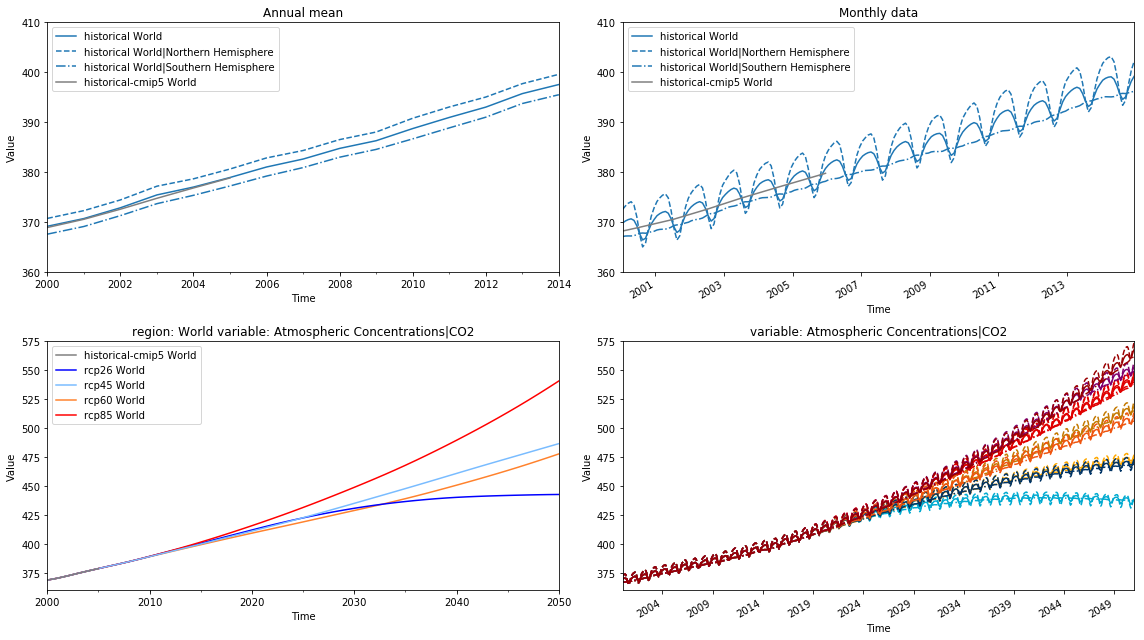

<IPython.core.display.Javascript object>

In [16]:
pdf = db.filter(variable="*Conc*CO2", year=range(2000, 2051))
pdf_monthly = db_monthly.filter(variable="*Conc*CO2", year=range(2000, 2051))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

pdf.filter(year=range(2000, 2021), scenario=["historical*"]).line_plot(
    ax=axes[0][0], color="scenario", linestyle="region", figsize=(16, 9), legend=True
)
axes[0][0].set_title("Annual mean")
axes[0][0].set_ylim([360, 410])

pdf_monthly.filter(year=range(2000, 2021), scenario=["historical*"]).line_plot(
    ax=axes[0][1], color="scenario", linestyle="region", figsize=(16, 9), legend=True
)
axes[0][1].set_title("Monthly data")
axes[0][1].set_ylim(axes[0][0].get_ylim())

pdf.filter(year=range(2000, 2051), scenario=["historical-cmip5", "*rcp*"]).line_plot(
    ax=axes[1][0], color="scenario", linestyle="region", figsize=(16, 9)
)
axes[1][0].set_ylim([360, 575])

pdf_monthly.filter(
    year=range(2000, 2051), scenario=["historical-cmip6", "*ssp*"]
).line_plot(ax=axes[1][1], color="scenario", linestyle="region", figsize=(16, 9))
axes[1][1].set_ylim(axes[1][0].get_ylim())

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "rcmip-co2-concentrations-near-term.pdf"))

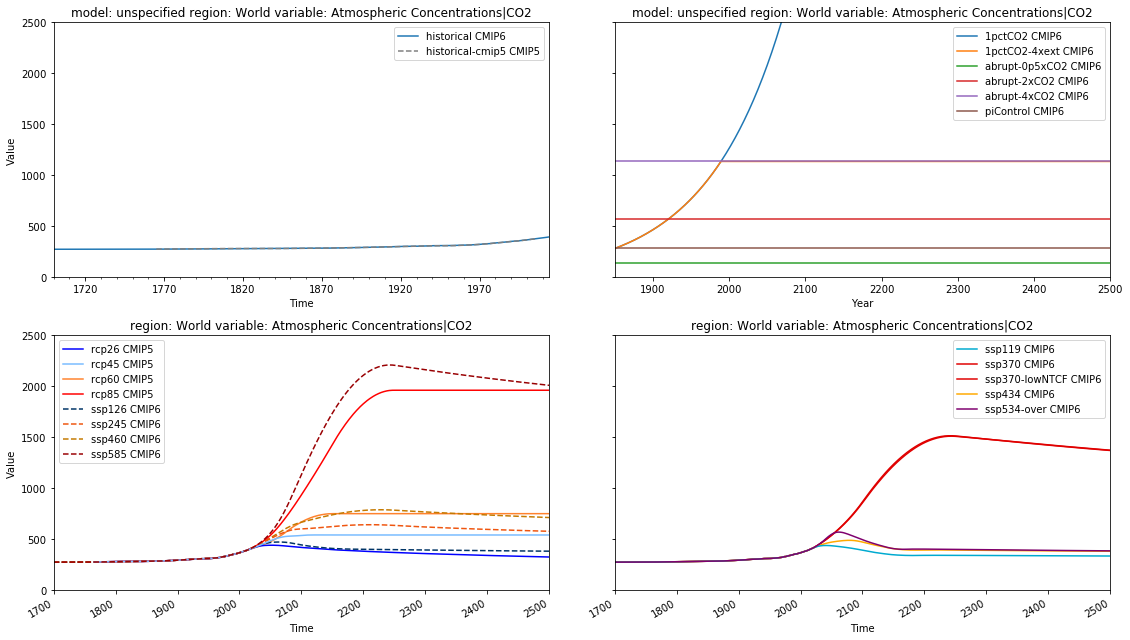

<IPython.core.display.Javascript object>

In [17]:
pdf = db.filter(variable="*Conc*CO2", region="World")
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(16, 9))

pdf.filter(scenario=["historical*"]).line_plot(
    ax=axes[0][0], color="scenario", linestyle="mip_era", figsize=(16, 9), legend=True
)

# no idea what this bug is...
idealised_plotter = (
    pdf.filter(scenario=["1pctCO2*", "abrupt*", "piControl*"]).to_iamdataframe().data
)
idealised_plotter["year"] = idealised_plotter["time"].apply(lambda x: x.year)
idealised_plotter = pyam.IamDataFrame(idealised_plotter.drop("time", axis="columns"))
idealised_plotter.line_plot(
    ax=axes[0][1], color="scenario", linestyle="mip_era", figsize=(16, 9), legend=True
)

cross_over_rfs = ["*26*", "*45*", "*60*", "*85*"]
pdf.filter(scenario=cross_over_rfs).line_plot(
    ax=axes[1][0], color="scenario", linestyle="mip_era", figsize=(16, 9), legend=True
)

pdf.filter(scenario=["ssp*"]).filter(scenario=cross_over_rfs, keep=False).line_plot(
    ax=axes[1][1], color="scenario", linestyle="mip_era", figsize=(16, 9), legend=True
)
axes[0][0].set_ylim([0, 2500])

plt.tight_layout()
plt.savefig(
    os.path.join(FIGURES_DIR, "rcmip-co2-concentrations-rcp-v-ssp-v-idealised.pdf")
)

In [18]:
db.filter(level=1)["variable"].unique()

array(['Emissions|BC', 'Emissions|CH4', 'Emissions|CO', 'Emissions|CO2',
       'Emissions|N2O', 'Emissions|NH3', 'Emissions|NOx', 'Emissions|OC',
       'Emissions|Sulfur', 'Emissions|VOC',
       'Atmospheric Concentrations|CH4', 'Atmospheric Concentrations|CO2',
       'Atmospheric Concentrations|N2O',
       'Effective Radiative Forcing|Anthropogenic',
       'Effective Radiative Forcing|Natural',
       'Radiative Forcing|Anthropogenic', 'Radiative Forcing|Natural'],
      dtype=object)

<IPython.core.display.Javascript object>

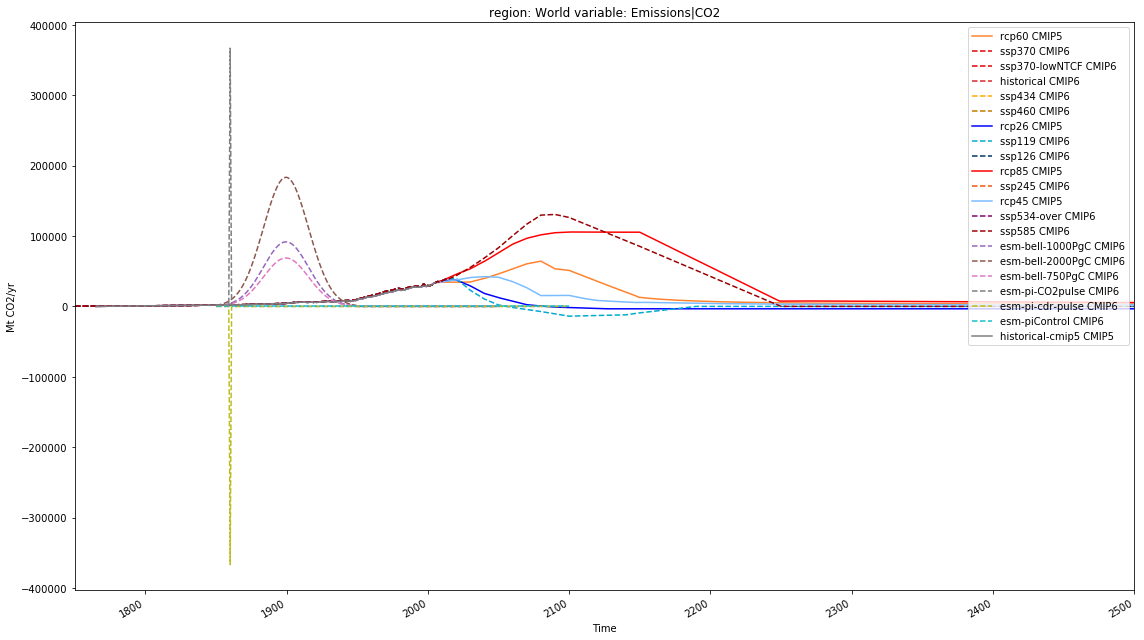

<IPython.core.display.Javascript object>

In [19]:
ax = db.filter(variable="*Emis*CO2", region="World").line_plot(
    color="scenario", linestyle="mip_era", figsize=(16, 9), legend=True
)
ax.set_ylabel("Mt CO2/yr")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "rcmip-co2-emissions.pdf"))

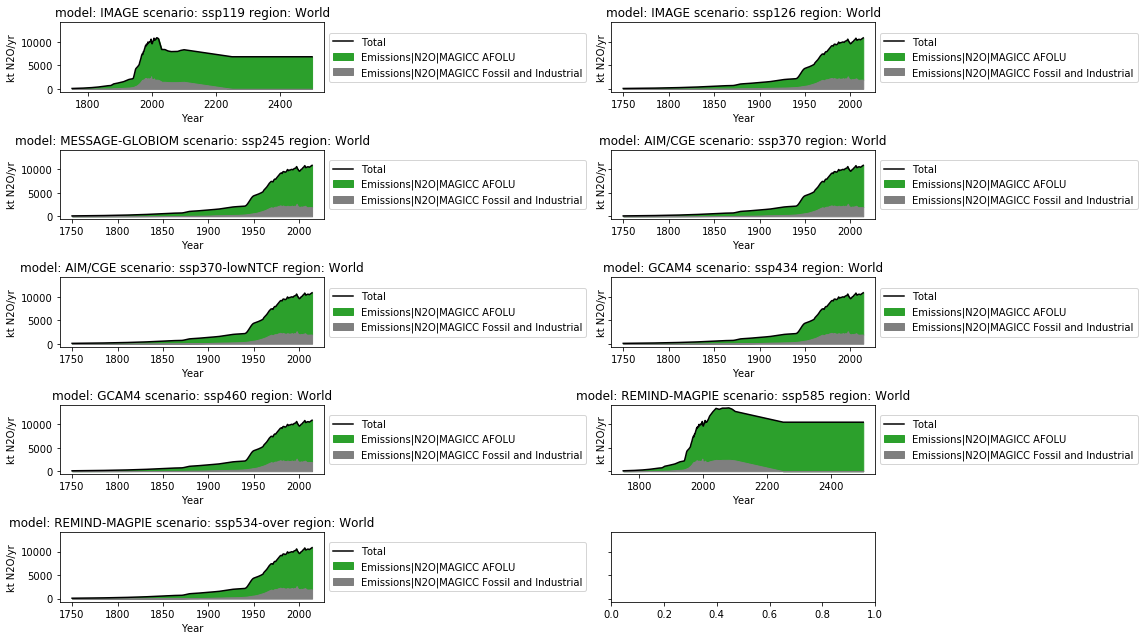

<IPython.core.display.Javascript object>

In [20]:
color_map = {
    "Emissions|N2O|MAGICC AFOLU": "tab:green",
    "Emissions|N2O|MAGICC Fossil and Industrial": "tab:gray",
}

pyam.run_control().update({"color": {"variable": color_map}})

fig, axes = plt.subplots(nrows=5, ncols=2, sharey=True, figsize=(16, 9))
axes = axes.flatten()

pargs = zip(
    [
        "ssp119",
        "ssp126",
        "ssp245",
        "ssp370",
        "ssp370-lowNTCF-gidden",
        "ssp370-lowNTCF-aerchemmip",
        "ssp434",
        "ssp460",
        "ssp585",
        "ssp534-over",
    ],
    axes,
)
for scenario, ax in pargs:
    db.filter(
        variable="*Emis*|N2O|*", region="World", scenario=scenario
    ).to_iamdataframe().swap_time_for_year().stack_plot(
        ax=ax, total={"color": "black", "lw": 1.5}
    )

plt.tight_layout()

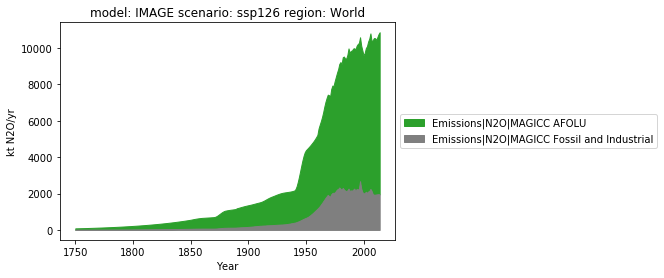

<IPython.core.display.Javascript object>

In [21]:
db.filter(
    variable="*Emis*|N2O|*", region="World", scenario="ssp126"
).to_iamdataframe().swap_time_for_year().stack_plot()

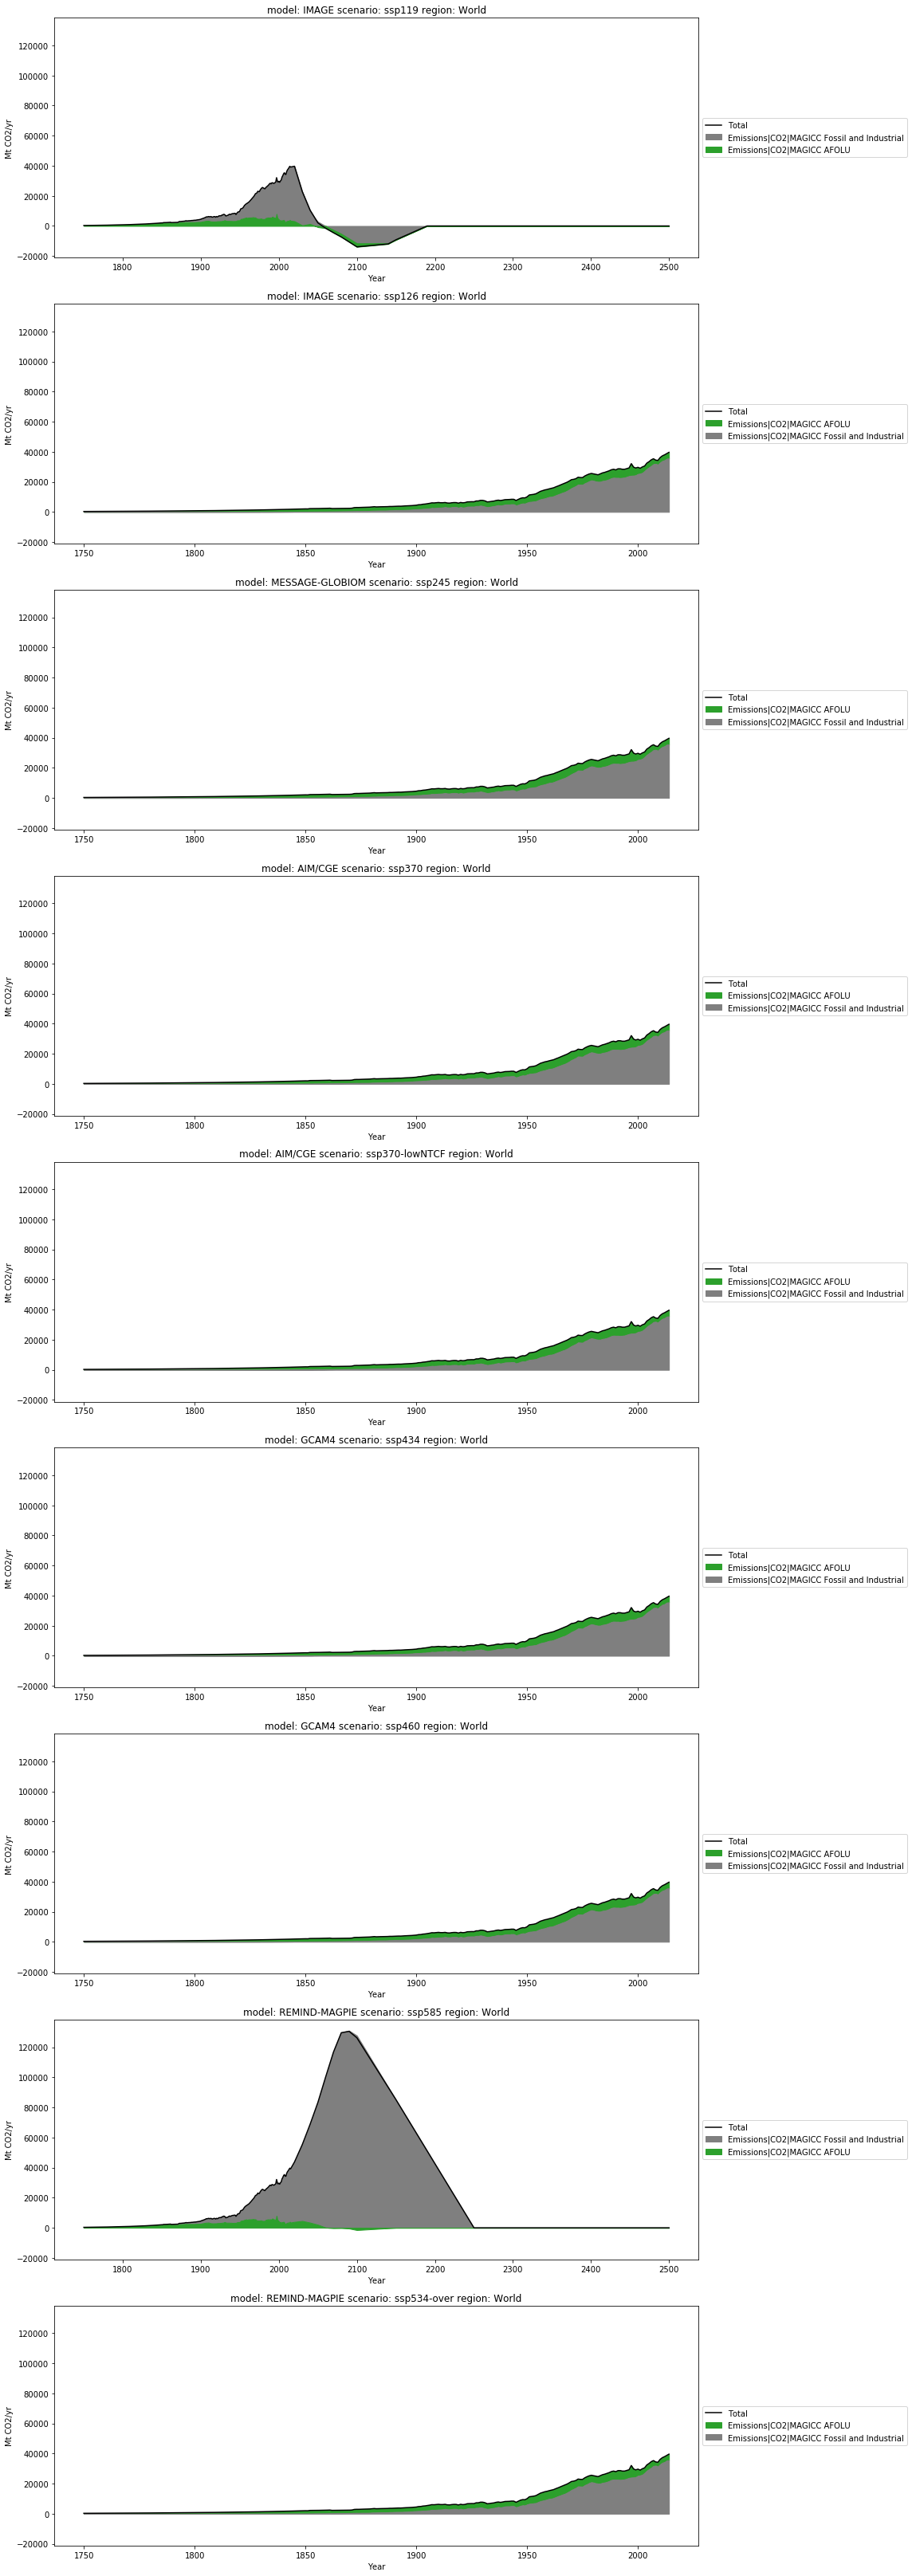

<IPython.core.display.Javascript object>

In [22]:
color_map = {
    "Emissions|CO2|MAGICC AFOLU": "tab:green",
    "Emissions|CO2|MAGICC Fossil and Industrial": "tab:gray",
}

pyam.run_control().update({"color": {"variable": color_map}})

fig, axes = plt.subplots(nrows=9, ncols=1, sharey=True, figsize=(16, 45))
axes = axes.flatten()

pargs = zip(
    [
        "ssp119",
        "ssp126",
        "ssp245",
        "ssp370",
        "ssp370-lowNTCF-gidden",
        "ssp370-lowNTCF-aerchemmip",
        "ssp434",
        "ssp460",
        "ssp585",
        "ssp534-over",
    ],
    axes,
)
for scenario, ax in pargs:
    db.filter(
        variable="*Emis*|CO2|*", level=2, region="World", scenario=scenario
    ).to_iamdataframe().swap_time_for_year().stack_plot(
        ax=ax, total={"color": "black", "lw": 1.5}
    )

plt.tight_layout()

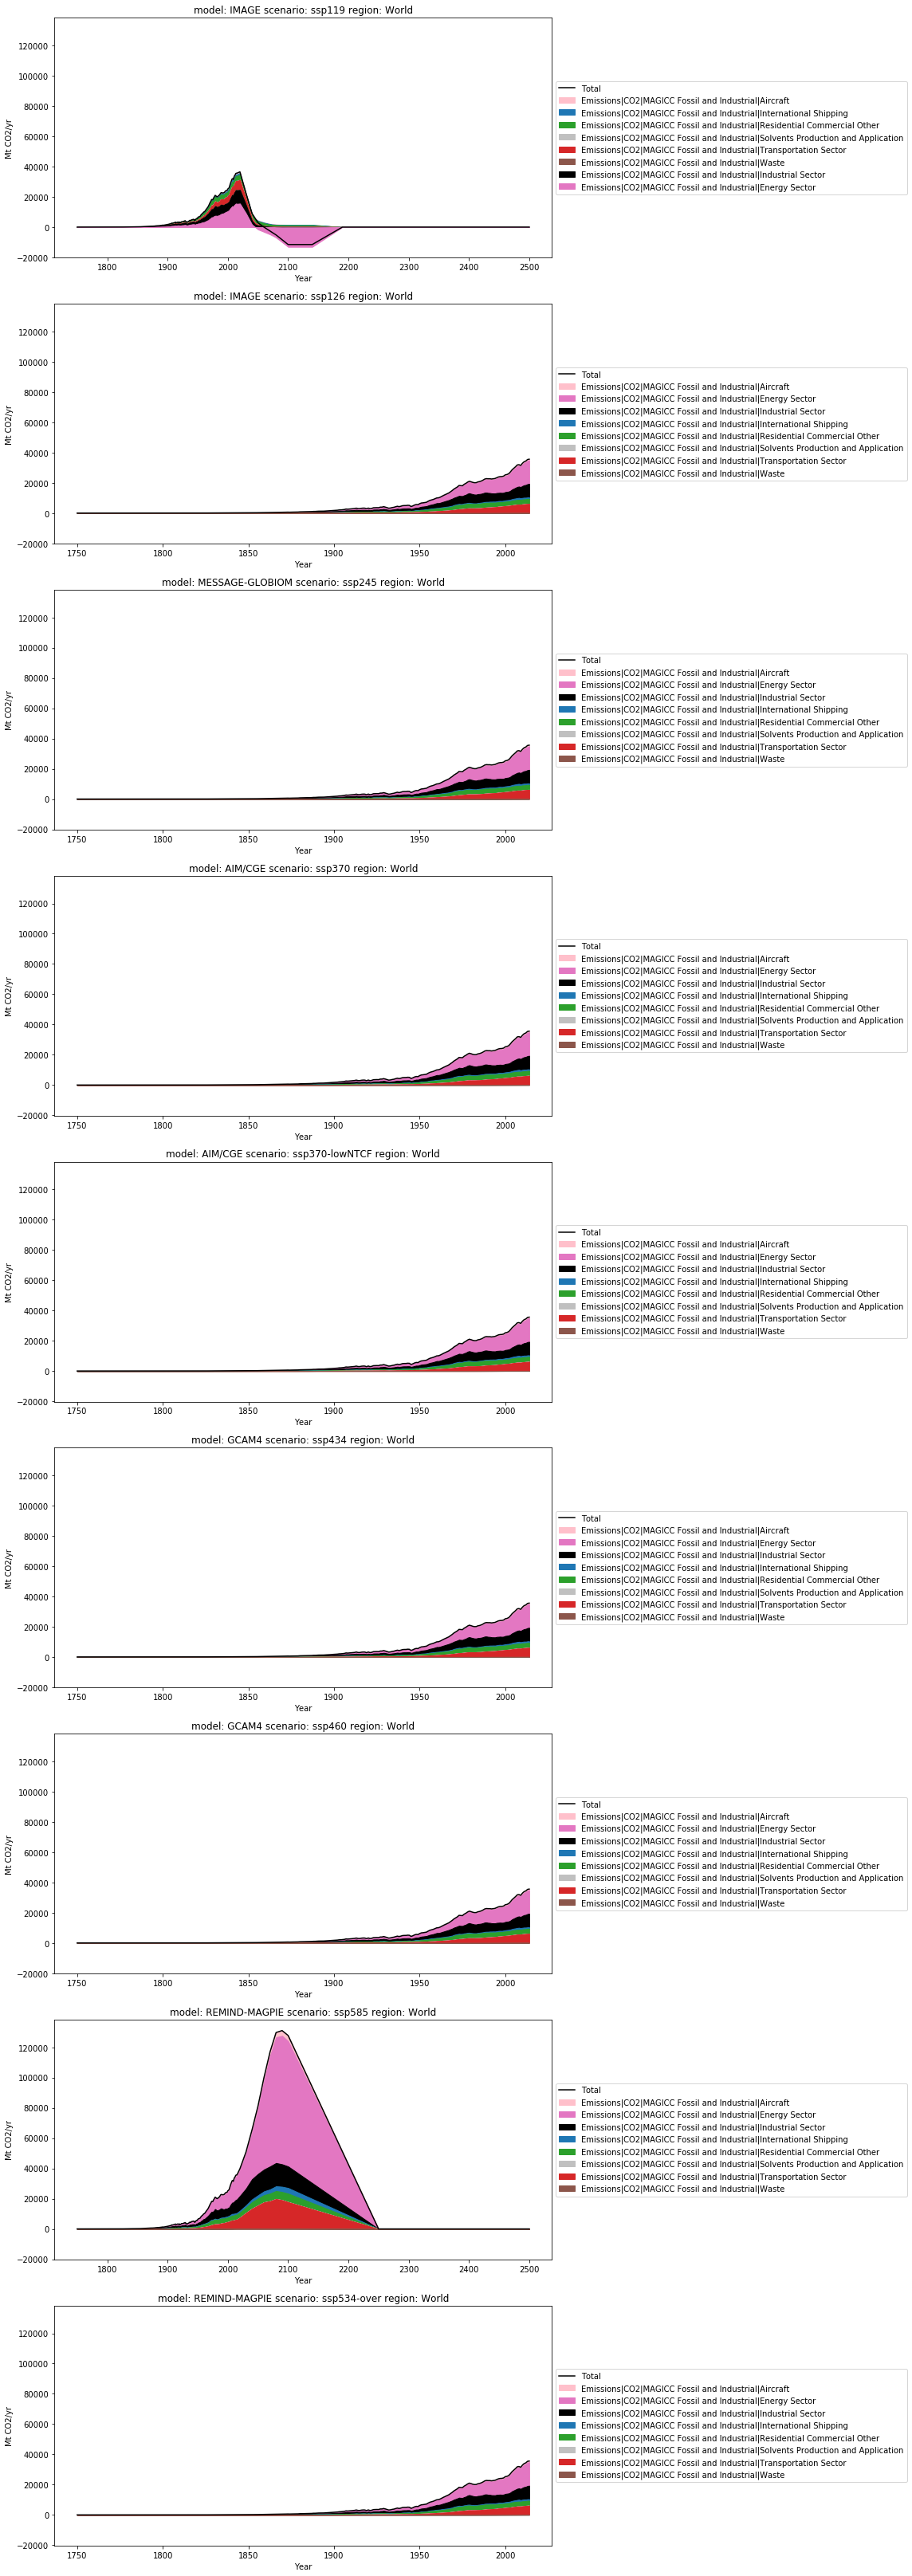

<IPython.core.display.Javascript object>

In [23]:
color_map = {
    "Emissions|CO2|MAGICC Fossil and Industrial|Aircraft": "pink",
    "Emissions|CO2|MAGICC Fossil and Industrial|International Shipping": "tab:blue",
    "Emissions|CO2|MAGICC Fossil and Industrial|Residential Commercial Other": "tab:green",
    "Emissions|CO2|MAGICC Fossil and Industrial|Solvents Production and Application": "silver",
    "Emissions|CO2|MAGICC Fossil and Industrial|Transportation Sector": "tab:red",
    "Emissions|CO2|MAGICC Fossil and Industrial|Waste": "tab:brown",
    "Emissions|CO2|MAGICC Fossil and Industrial|Industrial Sector": "black",
    "Emissions|CO2|MAGICC Fossil and Industrial|Energy Sector": "tab:pink",
}

pyam.run_control().update({"color": {"variable": color_map}})

fig, axes = plt.subplots(nrows=9, ncols=1, sharey=True, figsize=(16, 45))
axes = axes.flatten()

pargs = zip(
    [
        "ssp119",
        "ssp126",
        "ssp245",
        "ssp370",
        "ssp370-lowNTCF-gidden",
        "ssp370-lowNTCF-aerchemmip",
        "ssp434",
        "ssp460",
        "ssp585",
        "ssp534-over",
    ],
    axes,
)
for scenario, ax in pargs:
    db.filter(
        variable="*Emis*|CO2|MAGICC Fossil and Industrial|*",
        region="World",
        scenario=scenario,
    ).to_iamdataframe().swap_time_for_year().stack_plot(
        ax=ax, total={"color": "black", "lw": 1.5}
    )

plt.tight_layout()

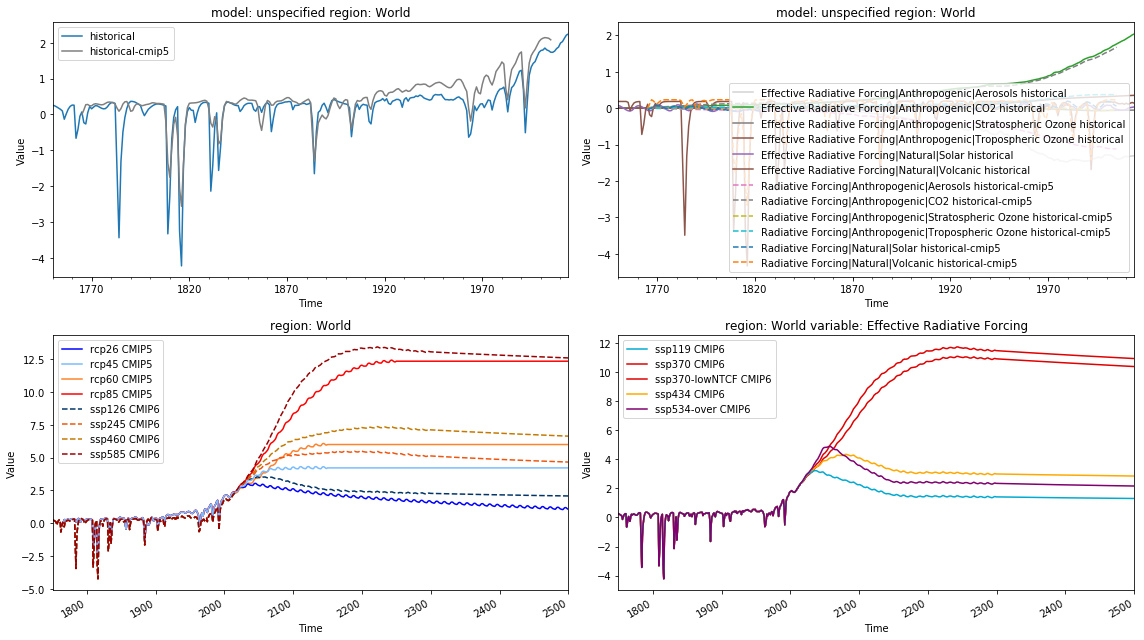

<IPython.core.display.Javascript object>

In [24]:
pdf = db.filter(variable="*Forcing", region="World")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

pdf.filter(scenario=["historical*"]).line_plot(
    ax=axes[0][0], color="scenario", figsize=(16, 9), legend=True
)

db.filter(variable="*Forcing*").filter(
    variable=["*Aerosols", "*CO2", "*Solar", "*Volcanic", "*Ozone"],
    region="World",
    scenario=["historical*"],
).line_plot(
    ax=axes[0][1], color="variable", linestyle="scenario", figsize=(16, 9), legend=True
)

cross_over_rfs = ["*26*", "*45*", "*60*", "*85*"]
pdf.filter(scenario=cross_over_rfs).line_plot(
    ax=axes[1][0], color="scenario", linestyle="mip_era", figsize=(16, 9), legend=True
)

pdf.filter(scenario=["ssp*"]).filter(scenario=cross_over_rfs, keep=False).line_plot(
    ax=axes[1][1], color="scenario", linestyle="mip_era", figsize=(16, 9), legend=True
)
# axes[0][0].set_ylim([0, 15])

plt.tight_layout()

(-2, 2.5)

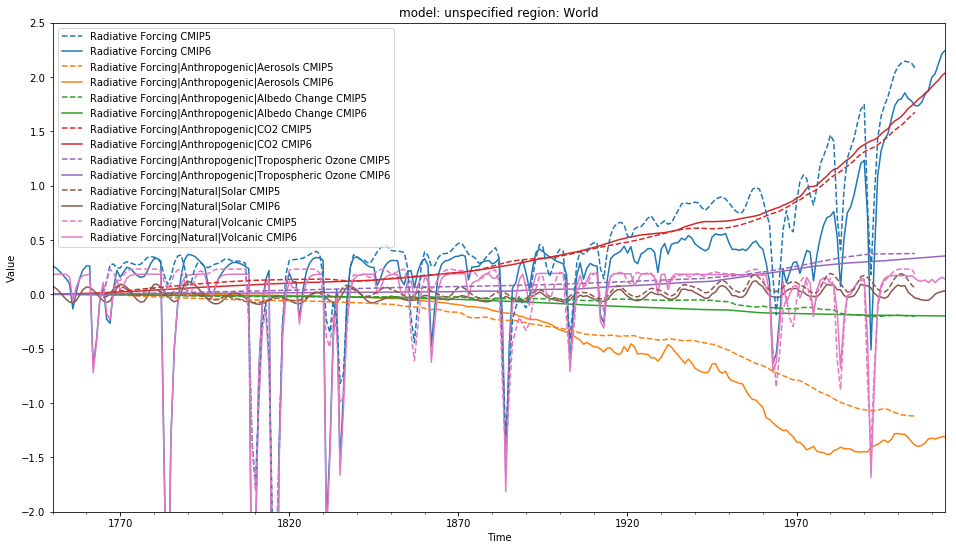

<IPython.core.display.Javascript object>

In [25]:
pdf = (
    db.filter(variable="*Forcing*")
    .filter(
        variable=[
            "*Forcing",
            "*Forcing*Aerosols",
            "*Forcing*CO2",
            "*Forcing*Solar",
            "*Forcing*Volcanic",
            "*Forcing*Trop*Ozone",
            "*Forcing*Albedo Change",
        ],
        region="World",
        scenario=["historical*"],
    )
    .timeseries()
    .reset_index()
)
pdf["variable"] = pdf["variable"].apply(lambda x: x.replace("Effective ", ""))
pdf = scmdata.ScmDataFrame(pdf)
ax = pdf.line_plot(color="variable", linestyle="mip_era", figsize=(16, 9), legend=True)
ax.set_ylim([-2, 2.5])

In [26]:
comp = db.filter(
    variable=[
        "*Forcing",
        "*Forcing*Aerosols",
        "*Forcing*CO2",
        "*Forcing*Solar",
        "*Forcing*Volcanic",
        "*Forcing*Trop*Ozone",
        "*Forcing*Albedo Change",
    ],
    region="World",
    scenario="historical*",
    year=range(1950, 2020),
).timeseries()
idx = comp.index.names
comp = comp.reset_index()
comp["variable"] = comp["variable"].str.replace("Effective ", "")
comp = comp.set_index(idx).sort_index()
comp.groupby("variable").diff()

time                                                                                                                 1950-01-01  \
model       scenario         region variable                                           unit  activity_id    mip_era               
unspecified historical       World  Radiative Forcing                                  W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Anthropogenic|Albedo Change      W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Anthropogenic|CO2                W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Anthropogenic|Tropospheric Ozone W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Natural|Solar                    W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Natural|Volcanic                 W/m^2 not_applicable CMIP6           NaN   
            historical-cmip5 World  Radiative Forcing                                  W/m^2 not_applicable CMIP5      0.367040   
                                    Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5      0.256839   
                                    Radiative Forcing|Anthropogenic|Albedo Change      W/m^2 not_applicable CMIP5      0.077221   
                                    Radiative Forcing|Anthropogenic|CO2                W/m^2 not_applicable CMIP5     -0.062070   
                                    Radiative Forcing|Anthropogenic|Tropospheric Ozone W/m^2 not_applicable CMIP5      0.023938   
                                    Radiative Forcing|Natural|Solar                    W/m^2 not_applicable CMIP5      0.047746   
                                    Radiative Forcing|Natural|Volcanic                 W/m^2 not_applicable CMIP5      0.005407   

time                                                                                                                 1951-01-01  \
model       scenario         region variable                                           unit  activity_id    mip_era               
unspecified historical       World  Radiative Forcing                                  W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Anthropogenic|Albedo Change      W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Anthropogenic|CO2                W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Anthropogenic|Tropospheric Ozone W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Natural|Solar                    W/m^2 not_applicable CMIP6           NaN   
                                    Radiative Forcing|Natural|Volcanic                 W/m^2 not_applicable CMIP6           NaN   
            historical-cmip5 World  Radiative Forcing                                  W/m^2 not_applicable CMIP5      0.387874   
                                    Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5      0.263975   
                                    Radiative Forcing|Anthropogenic|Albedo Change      W/m^2 not_applicable CMIP5      0.067271   
                                    Radiative Forcing|Anthropogenic|CO2                W/m^2 not_applicable CMIP5     -0.059511   
                                    Radiative Forcing|Anthropogenic|Tropospheric Ozone W/m^2 not_applicable CMIP5      0.022417   
                                    Radiative Forcing|Natural|Solar  

<IPython.core.display.Javascript object>

In [27]:
fdf = db.filter(variable="*Forcing*")
for variable in fdf["variable"].unique():
    if variable.startswith("Effective"):
        continue
    diff = (
        fdf.filter(
            variable="*{}".format(variable),
            region="World",
            scenario="historical*",
            year=range(1850, 1851),
        )
        .timeseries()
        .diff()
    )
    if diff.shape[0] == 1:
        continue
    if (np.abs(diff.values) > 0.05).any():
        print(variable)
        print(diff)

/Users/znicholls/miniconda3/envs/rcmip/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


Radiative Forcing
time                                                                                          1850-01-01 00:00:00
model       scenario         region variable                    unit  activity_id    mip_era                     
unspecified historical       World  Effective Radiative Forcing W/m^2 not_applicable CMIP6                    NaN
            historical-cmip5 World  Radiative Forcing           W/m^2 not_applicable CMIP5               0.094572
Radiative Forcing|Anthropogenic|Aerosols
time                                                                                                                 1850-01-01 00:00:00
model       scenario         region variable                                           unit  activity_id    mip_era                     
unspecified historical       World  Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6                    NaN
            historical-cmip5 World  Radiative Forcing|Anthropogenic|Aeroso

<IPython.core.display.Javascript object>

In [28]:
db.filter(
    variable="*Forcing*Aerosols",
    region="World",
    scenario="historical*",
    year=range(2000, 2020),
).timeseries().diff()

time                                                                                                                 2000-01-01 00:00:00  \
model       scenario         region variable                                           unit  activity_id    mip_era                        
unspecified historical       World  Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6                    NaN   
            historical-cmip5 World  Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5               0.181904   

time                                                                                                                 2001-01-01 00:00:00  \
model       scenario         region variable                                           unit  activity_id    mip_era                        
unspecified historical       World  Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6                    NaN   
            historical-cmip5 World  Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5               0.177635   

time                                                                                                                 2002-01-01 00:00:00  \
model       scenario         region variable                                           unit  activity_id    mip_era                        
unspecified historical       World  Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6                    NaN   
            historical-cmip5 World  Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5                0.17688   

time                                                                                                                 2003-01-01 00:00:00  \
model       scenario         region variable                                           unit  activity_id    mip_era                        
unspecified historical       World  Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6                    NaN   
            historical-cmip5 World  Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5               0.202347   

time                                                                                                                 2004-01-01 00:00:00  \
model       scenario         region variable                                           unit  activity_id    mip_era                        
unspecified historical       World  Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6                    NaN   
            historical-cmip5 World  Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5               0.236891   

time                                                                                                                 2005-01-01 00:00:00  \
model       scenario         region variable                                           unit  activity_id    mip_era                        
unspecified historical       World  Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6                    NaN   
            historical-cmip5 World  Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5               0.268367   

time                                                                                                                 2006-01-01 00:00:00  \
model       scenario         region variable                                           unit  activity_id    mip_era                        
unspecified historical       World  Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 not_applicable CMIP6                    NaN   
            historical-cmip5 World  Radiative Forcing|Anthropogenic|Aerosols           W/m^2 not_applicable CMIP5                    NaN   

time                                                                     

<IPython.core.display.Javascript object>

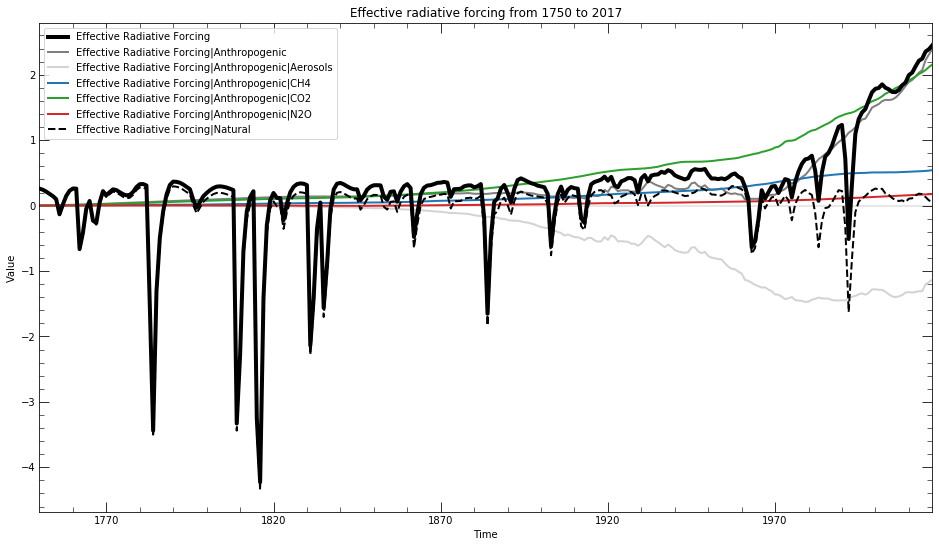

<IPython.core.display.Javascript object>

In [29]:
pkwargs = {"scenario": "ssp245", "year": range(1, 2018)}

ax = (
    db.filter(**pkwargs)
    .filter(variable="Effective Radiative Forcing*")
    .filter(
        variable=[
            "*CO2",
            "*CH4",
            "*N2O",
            "*Anthropogenic|Ozone",
            "*Aerosols",
            "*Other anthropogenic",
            "*Anthropogenic",
        ]
    )
    .line_plot(color="variable", linewidth=2, figsize=(16, 9))
)

ax = (
    db.filter(**pkwargs)
    .filter(variable="Effective Radiative Forcing")
    .line_plot(color="variable", linewidth=4, ax=ax)
)

ax = (
    db.filter(**pkwargs)
    .filter(variable="Effective Radiative Forcing|Natural")
    .line_plot(color="variable", linewidth=2, linestyle="--", ax=ax)
)

ax.axhline(0, alpha=0.7, color="lightgray", zorder=1.5)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(
    axis="both",
    which="both",
    direction="in",
    top=True,
    bottom=True,
    left=True,
    right=True,
)
ax.tick_params(axis="both", which="minor", length=5)
ax.tick_params(axis="both", which="major", length=10)

ax.set_title("Effective radiative forcing from 1750 to 2017")
plt.savefig("erf_ar6_fod_magicc_ts_history.pdf")

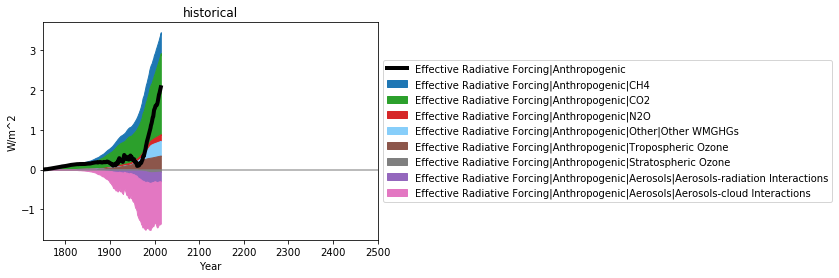

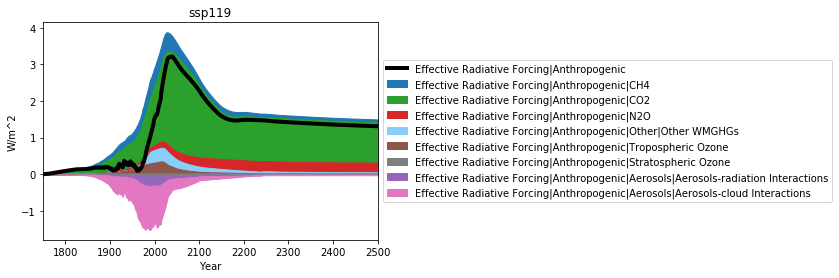

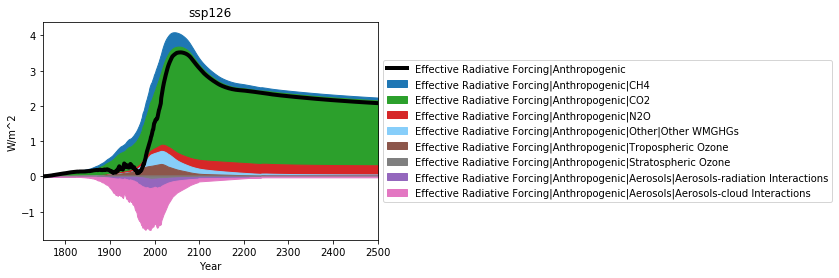

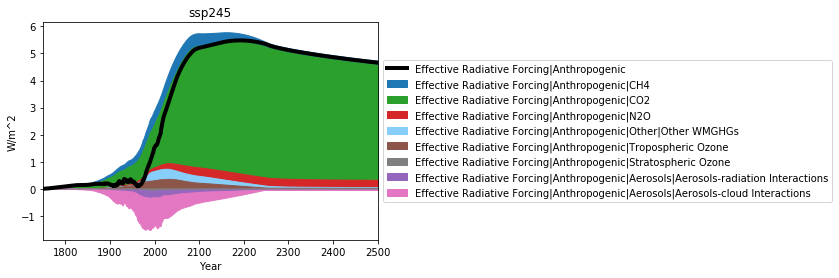

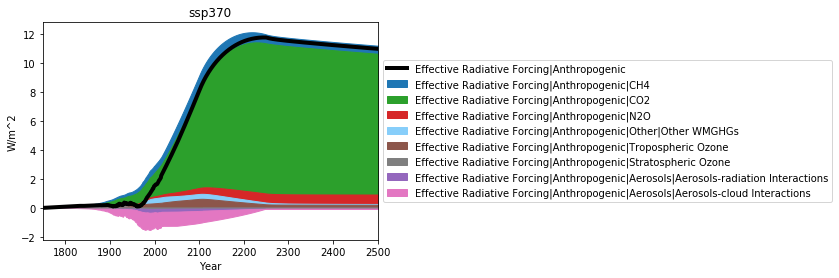

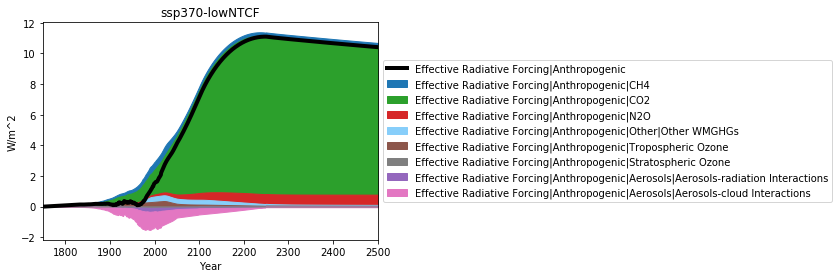

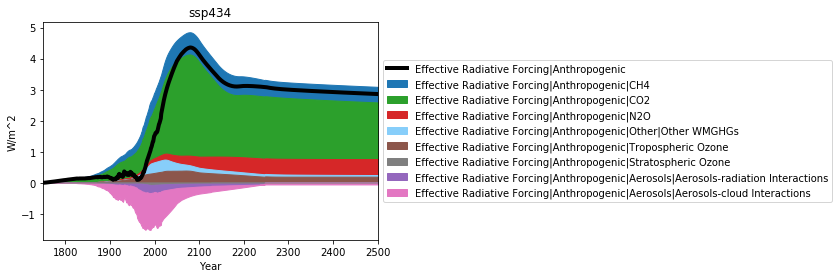

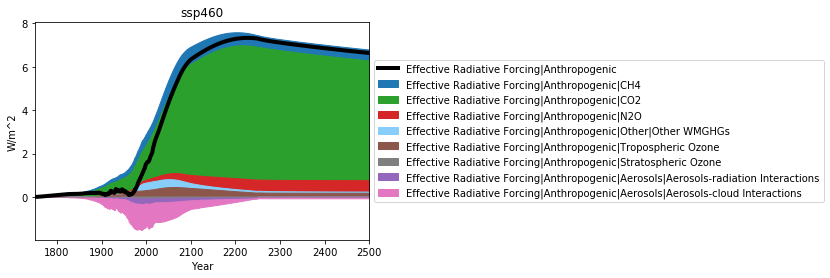

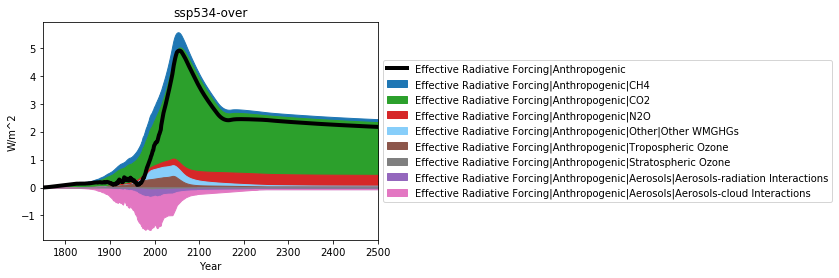

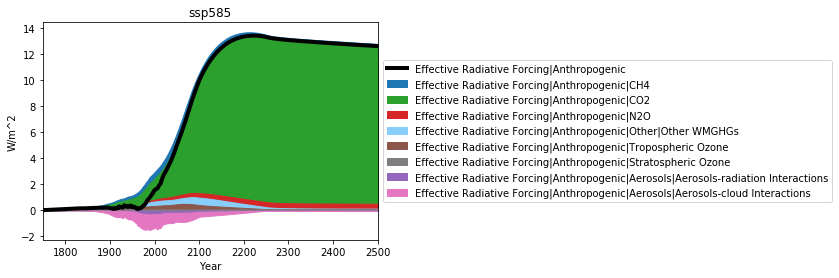

<IPython.core.display.Javascript object>

In [30]:
stack_vars = [
    "*CO2",
    "*CH4",
    "*N2O",
    "*Other WMGHGs",
    "*Ozone",
    "*Aerosol*cloud*",
    "*Aerosol*radiation*",
]

pdb = db.filter(variable="Effective Radiative Forcing*")
for s in tqdm.tqdm_notebook(sorted(pdb["scenario"].unique())):

    pdf = pdb.filter(variable=stack_vars, scenario=s).to_iamdataframe().timeseries()
    pdf.columns = pdf.columns.map(lambda x: x.year)
    # tiny wiggles in Ozone forcing at start causing the plot to blow up
    # so remove
    pdf[np.isclose(pdf, 0, atol=0.01)] = 0

    pdf = pyam.IamDataFrame(pdf)
    ax = pdf.stack_plot()
    anthro_total = pdb.filter(
        scenario=s, variable="Effective Radiative Forcing|Anthropogenic"
    ).timeseries()
    anthro_total.columns = anthro_total.columns.map(lambda x: x.year)
    ax.plot(
        anthro_total.columns,
        anthro_total.values.squeeze(),
        color="black",
        linewidth=4,
        label="Effective Radiative Forcing|Anthropogenic",
    )
    ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    ax.axhline(0, alpha=0.7, color="gray", zorder=1.5)
    ax.set_xlim(1750, 2500)
    ax.set_title(s)